#Automatic online Hate Speech recognition


**Hate Speech** or “*hate expressions*” or “*hate language*” – consists of a **specific form of discrimination** which expresses itself not through actions or omissions, but through deplorable ways of expressing thought. Disseminated and reiterated through the Internet, these forms of expression have **the effect of fueling prejudices, consolidating stereotypes and reinforcing the hostility** of certain groups of people, usually in the majority or in a dominant position in a given social context, **towards other groups with different characteristics** (religion, sex, sexual orientation, origin, physical and genetic elements), generally minorities.

**Activity definition**

**Objective**: automatically recognize if a text (for example a tweet) contains hate speech against immigrants, Roma and Muslims ([HaSpeeDe2](https://ceur-ws.org/Vol-2765/paper162.pdf))



#**Text treatment**

#Dataset Loading and Exploration

Let's upload the file containing the tweets with the labels: Our dataset! (our dataset is in Italian, but you can use your own dataset from now on)

1.1 let's drag and drop our file "**dataset.csv**" from the menu on the left by clicking on the icon of a folder.

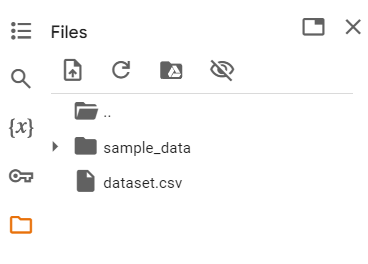

1.2 verify that the dataset is contained in your folder (**!ls**)

In [ ]:
!ls "/content"

dataset.csv  sample_data


1.3 read the dataset via the library **[pandas](https://pandas.pydata.org/docs/reference/index.html)**

> library suitable for working with data tables or databases

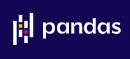


(Remember? Lots of libraries written by others that we can use to make our work easier)

In [ ]:
import pandas as pd
'''
Pay attention to the format of the file you want to open:
pd.read_csv for file.csv/tsv (plain text file)
pd.read_excel for file.xls/odf etc... (binary file)
'''

corpus = pd.read_csv("/content/dataset.csv", sep=',')

1.4 inspect the [dataset](https://pandas.pydata.org/docs/reference/frame.html):

- what is the name of the object type loaded with pandas? example: [type](https://docs.python.org/3/library/functions.html)(dataset)
- how many rows and columns does the dataset* contain?
- what are the names of the columns of the dataset?


**dataset or corpus (linguistic data set)*

In [ ]:
print(type(corpus))
print(corpus.shape)
print(corpus.columns)

<class 'pandas.core.frame.DataFrame'>
(400, 3)
Index(['id', 'text', 'hs'], dtype='object')


1.5 we show the dataset:

(1) pandas provides the [[head()]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head) method

(2) colab allows you to view it simply by printing the variable containing the dataset on the screen

In [ ]:
corpus.head()

,id,text,hs
0,8713,"Educazione stradale, i Vigili in Pensione sezi...",0
1,7083,ne #leuropa chi non rispetta le minoranze l' ...,0
2,7825,"#promesse Se poi non se ne farà nulla, sarà co...",0
3,8475,"Il Dalai Lama ha detto mercoledì a Malmø, in S...",0
4,7403,"Baobab come i trafficanti ""Così aiutiamo i mig...",0


In [ ]:
corpus

,id,text,hs
0,8713,"Educazione stradale, i Vigili in Pensione sezi...",0
1,7083,ne #leuropa chi non rispetta le minoranze l' ...,0
2,7825,"#promesse Se poi non se ne farà nulla, sarà co...",0
3,8475,"Il Dalai Lama ha detto mercoledì a Malmø, in S...",0
4,7403,"Baobab come i trafficanti ""Così aiutiamo i mig...",0
...,...,...,...
395,7332,. Gli immigrati che delinquono in Italia prima...,1
396,7631,@user @user Perché i nigeriani non sono forse ...,1
397,8675,@user Queste le promesse fatte dai migranti a ...,1
398,7939,"@user Fidati che è ""Fabblicato in Italia"" anch...",1


1.6 Is our dataset balanced?

Count how many tweets contain hate speech and how many do not


*Remembers the dataset columns* ([selectable with dataset['column_name']](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)) *can also be treated as lists* ( using the method [tolist()](https://dataindependent.com/pandas/convert-dataframe-to-list-pd-df-values-tolist/) )

In [ ]:
n_yes = corpus['hs'].tolist().count(1)
n_no = corpus['hs'].tolist().count(0)

print('number of tweets containing Hate Speech: ', n_yes)
print('number of tweets NOT containing Hate Speech: ', n_no)

number of tweets containing Hate Speech:  200
number of tweets NOT containing Hate Speech:  200


1.7 Convert labels from strings to numbers:
- yes --> 1
- no --> 0

*recommended method:* [replace()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace)

In [ ]:
corpus['hs'] = corpus['hs'].replace('yes', 1)
corpus['hs'] = corpus['hs'].replace('no', 0)

In [ ]:
# Print the first 10 labels:

corpus['hs'].tolist()[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1.8 We extract the **texts** and **labels** from the dataset

advice: you can take inspiration from exercise 1.6

In [ ]:
labels = corpus['hs'].tolist()
texts = corpus['text'].tolist()

print(texts[0])
print(labels[0])

Educazione stradale, i Vigili in Pensione sezione di Marsala tengono corsi ai migranti URL
0


#Supervised classification

**Supervised learning**

>The system receives texts annotated with labels based on the output you want to obtain and - starting from this training data - must extract a general rule that associates the correct label with each new input text never seen before.

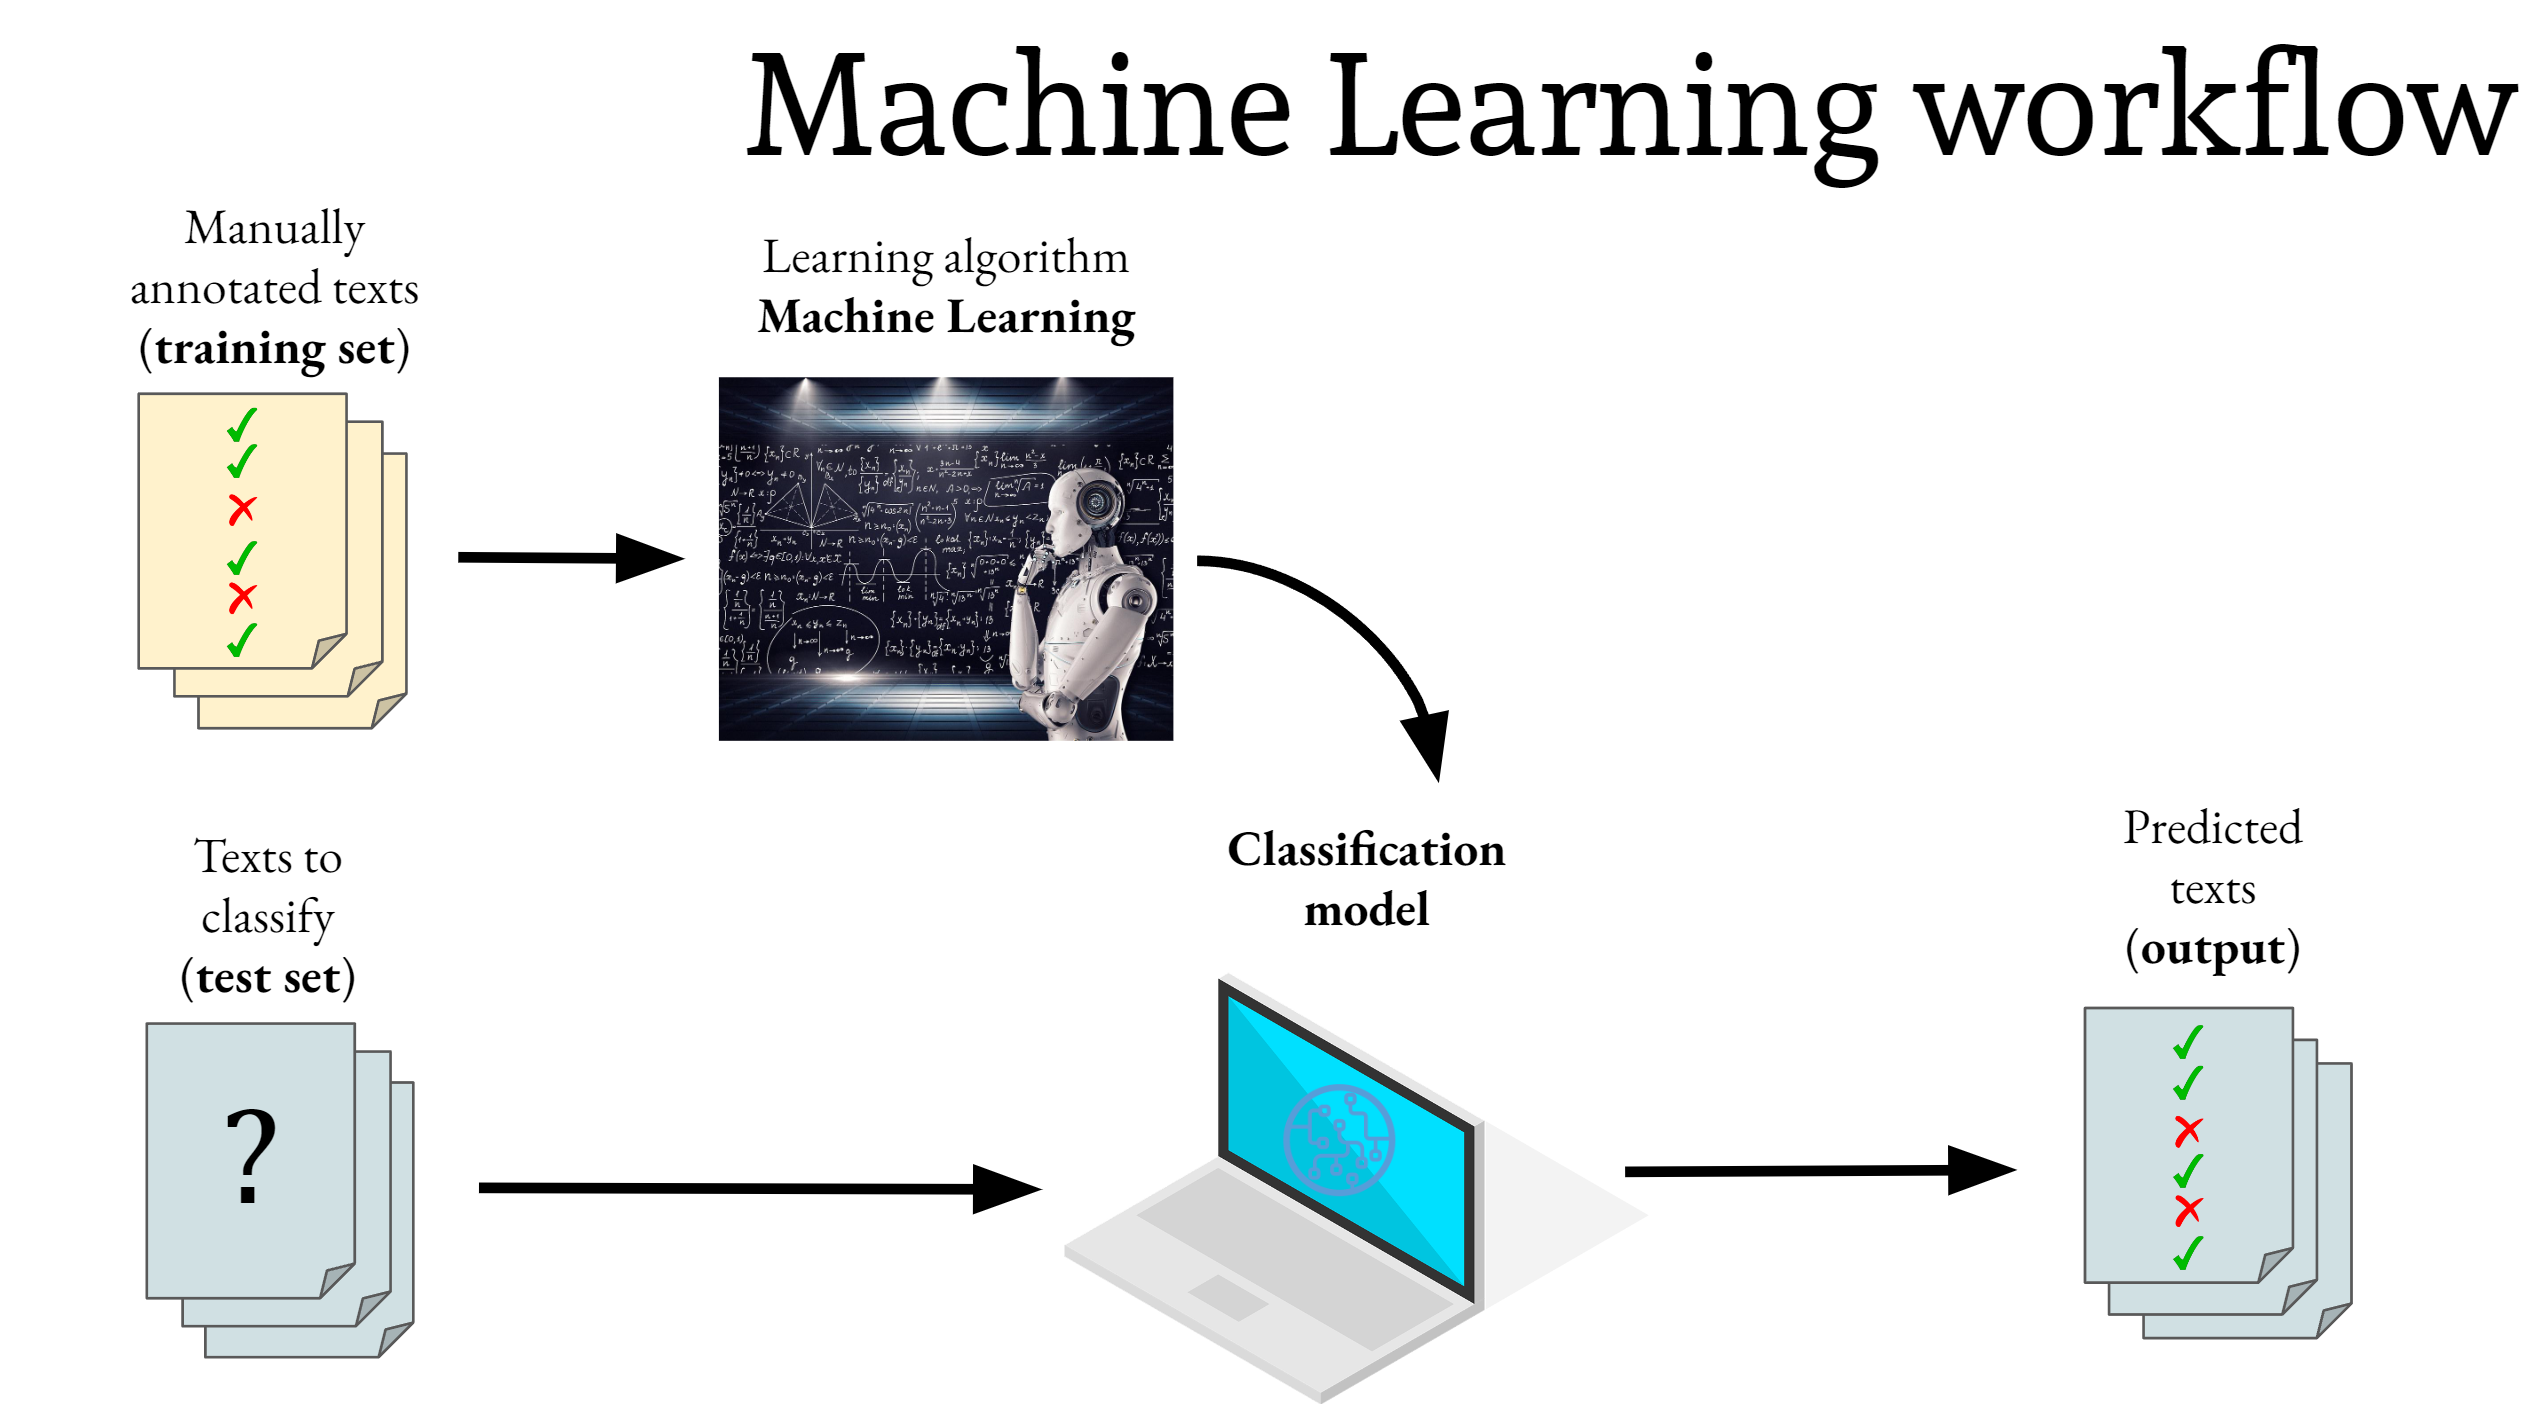

##1. Division of the dataset into Training and Test sets

1.1 Divide the dataset into training and test sets, keeping in mind that:


- the training set must contain 80% of the texts in the dataset
- the test set the remaining 20%

*We can use the method* [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) *provided by scikit-learn*


In [ ]:
from sklearn.model_selection import train_test_split

X = texts
y = labels

train_tweets, test_tweets, y_train, y_test_gold = train_test_split(X, y, test_size=0.20)

print('Size dataset: ', len(texts))
print('Size training set: ', len(train_tweets))
print('Size test set: ', len(test_tweets))

Size dataset:  400
Size training set:  320
Size test set:  80


##2. Vector representation

2.1 Creation of the matrix: Preliminary Analysis

Library [Scikit-Learn](https://https://scikit-learn.org/stable/modules/classes.html):
- perfect for building ML-based systems

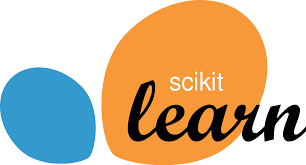

This library provides us with two possible vector representations of texts:

>(1) [CountVectorizer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) : converts the texts into vectors containing the number of occurrences of the tokens
>
>(2) [TfidfVectorizer()](
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): converts texts into vectors containing the "relevance" weight of the token in the dataset

2.1.1 Create two matrices using the two vectorization methods: (1) and (2)

> - extract only unigrams: e.g. CountVectorizer(*n_gram_range =*)*
> - the matrix must be constructed starting from the texts extracted from the dataset and to be displayed converted into an array (*toarray()*)


*In the future we recommend you try to extract bigrams and trigrams as well and compare the accuracy of the various models.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Solution:
vectorizer_count = CountVectorizer(ngram_range=(1,1))
X_count = vectorizer_count.fit_transform(texts)

print('matrix of vectors containing the number of token occurrences')
X_count.toarray()

matrix of vectors containing the number of token occurrences


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Solution:
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,1))
X_tfidf = vectorizer_tfidf.fit_transform(texts)

print('matrix of vectors containing the relevance weight of the tokens')
X_tfidf.toarray()

matrix of vectors containing the relevance weight of the tokens


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

2.2 Creation of the matrices: on the training and test sets

Choose the vectorizer (*vectorizer_count* or *vectorizer_tfidf*) you prefer and vectorize the training texts (X_train) and test texts (X_test), creating the corresponding matrices with the following methods:

> - fit_transform() is used for training data
> - transform() is used for test data

In [ ]:
# Solution:
X_train = vectorizer_tfidf.fit_transform(train_tweets)
X_test = vectorizer_tfidf.transform(test_tweets)

2.2.1 Print the size of the two matrices

*We recommend using the method* [.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)

In [ ]:
# One possible solution:

print(X_train.shape)
print(X_test.shape)

(320, 2993)
(80, 2993)


##3. Automatic classification

The **Support-Vector Machine**, abbreviated **SVM** is one of the most used machine learning algorithms to especially solve binary classification problems (classes `1` and ` 0`).

> The goal of this algorithm is to ***find the hyperplane (or line in a 2D plane) that best divides a data set into two classes***.

***What is the best hyperplane?***

> The hyperplane that has the maximum distance between all points and which lies ***`in the middle of the boundary boundary`*** (i.e. the space that separates the hyperplane from the closest points of the two classes).


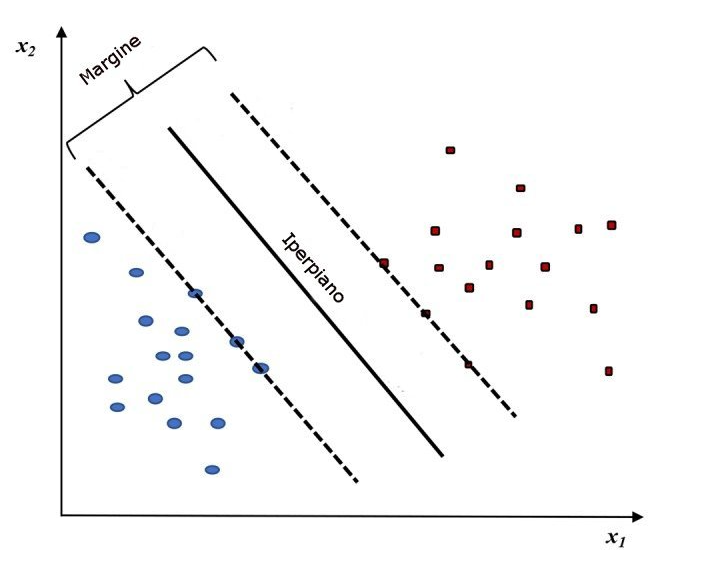

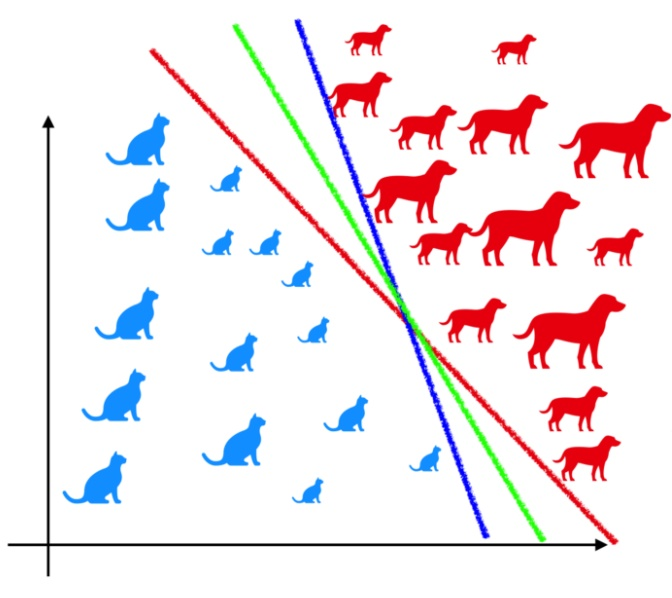

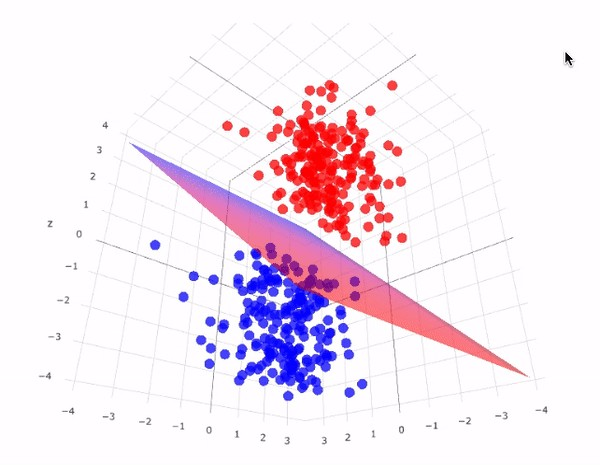

3.1 We train the model following the documentation to classify with the Support Vector Machine or Support Vector Classification ([SVC](https://scikit-learn.org/stable/modules/svm.html))

In [ ]:
from sklearn.svm import SVC

# Solution:
clf =  SVC()
clf.fit(X_train,y_train)

SVC()

3.2 Classifichiamo i tweets del test set usando il metodo descritto nella documentazione

In [ ]:
# Solution:
y_test_predicted = clf.predict(X_test)


print('tweet: ', test_tweets[0])
print()
print('Gold label (original): ', y_test_gold[0])
print()
print('Predicted label: ', y_test_predicted[0])

tweet:  una domanda. questi pseudo migranti nei loro paesi avevano sky,avevano gli smartphon,mi viene il dubbio se avevano acqua. vogliono vivere da turisti e non gli deve mancare niente. follie,offende gli italiani che lottano per la soprav.   URL di @user

Gold label (original):  1

Predicted label:  1


In [ ]:
# Predicting new unlabeled texts:
new_text = "che schifo fai negro? almeno studialo l'inno. Mi fai pena, hai sputato su una nazione piena di storia! non ci sono negri italiani!"

X_new_text = vectorizer_tfidf.transform([new_text])
y_text_predicted = clf.predict(X_new_text)
print('Text: ', new_text)
print('Predicted label: ', y_text_predicted)

Text:  che schifo fai negro? almeno studialo l'inno. Mi fai pena, hai sputato su una nazione piena di storia! non ci sono negri italiani!
Predicted label:  [1]


##4. Model evaluation

One of the most used evaluation measures is **accuracy**

> Accuracy measures the number of times the system got the class of the tweet right



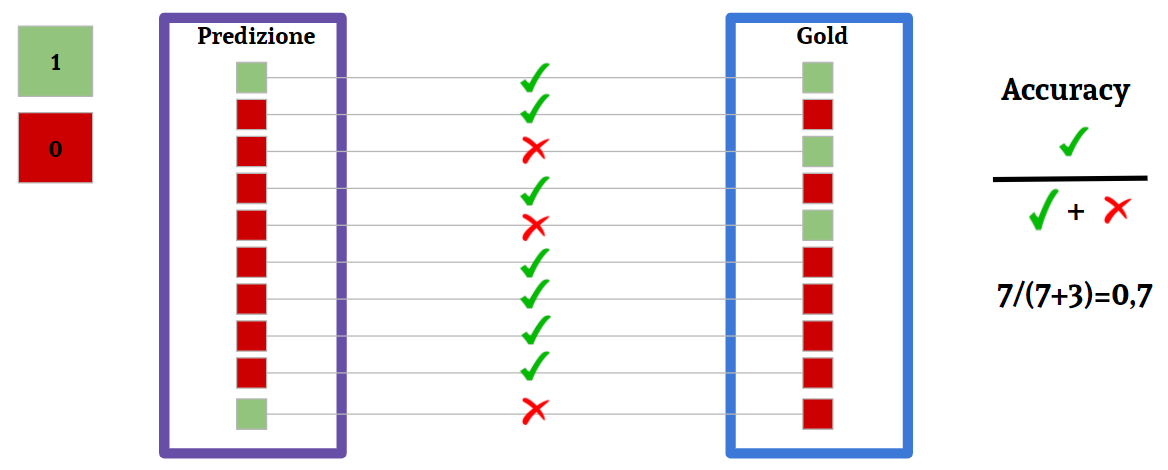

4.1 Calculate accuracy using the method provided by scikit-learn: [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
from sklearn.metrics import accuracy_score

# Solution:
accuracy = accuracy_score(y_test_gold, y_test_predicted)
accuracy

0.7375

4.2 Manually observe error cases:
- showing for each text not correctly classified the original labels (*y_test_gold*) and the predicted labels (*y_test_predette*)

In [ ]:
# One possible solution:

errors = {}

for t,i,j in zip(test_tweets, y_test_predicted, y_test_gold):
  if i != j:
    errors.setdefault(t, [])
    errors[t].append(i)
    errors[t].append(j)

c = 0
for k, v in errors.items():
  c += 1
  print(c, 'text: ', k)
  print(c, 'gold label: ', v[1])
  print(c, 'predicted label: ', v[0])
  print()

1 text:  #Grimoldi: L’onda lunga del degrado e della malavita portata dalle migliaia di immigrati africani clandestini accolti a Milano dalle giunte Pisapia e Sala, e nell’area metropolitana dai tanti... URL
1 gold label:  1
1 predicted label:  0

2 text:  Tempi infiniti per la ricollocazione. Migranti minorenni: "Siamo in Italia fermi da un anno senza far niente e senza studiare" URL via @user
2 gold label:  0
2 predicted label:  1

3 text:  Quando capirete che non siete poveri perché ci sono i migranti, ma perché vi sfrutta l'1% di ultraricchi che schiaccia in povertà miliardi di persone, l'umanità farà grandi passi avanti. Studiate!
3 gold label:  0
3 predicted label:  1

4 text:  @user Difendi l’Italia invece di aiutare, come al solito, gli stranieri ad insultarla e a tenerla sottomessa ai loro interessi.
4 gold label:  0
4 predicted label:  1

5 text:  @user @user Il danno erariale lo causano i finti profughi che ci costano 5 miliardi l'anno.
5 gold label:  0
5 predicted label:  1

4.3 Answer the following questions:
- how many texts were incorrectly predicted with the label 1?
- how many texts were incorrectly predicted with the label 0?
- how do you plan to improve this system for recognizing hate speech?


**Remember that even small changes in the text processing process can greatly affect system performance.**

In [ ]:
# One possible solution:

print('How many texts were incorrectly predicted with the label 1?')
print()

c = 0
for k, v in errors.items():
  if v[0] == 1:
    c += 1
    print(c, 'text: ', k)
    print(c, 'gold label: ', v[1])
    print(c, 'predicted label: ', v[0])
    print()

How many texts were incorrectly predicted with the label 1?

1 text:  Tempi infiniti per la ricollocazione. Migranti minorenni: "Siamo in Italia fermi da un anno senza far niente e senza studiare" URL via @user
1 gold label:  0
1 predicted label:  1

2 text:  Quando capirete che non siete poveri perché ci sono i migranti, ma perché vi sfrutta l'1% di ultraricchi che schiaccia in povertà miliardi di persone, l'umanità farà grandi passi avanti. Studiate!
2 gold label:  0
2 predicted label:  1

3 text:  @user Difendi l’Italia invece di aiutare, come al solito, gli stranieri ad insultarla e a tenerla sottomessa ai loro interessi.
3 gold label:  0
3 predicted label:  1

4 text:  @user @user Il danno erariale lo causano i finti profughi che ci costano 5 miliardi l'anno.
4 gold label:  0
4 predicted label:  1

5 text:  No. Non è Salvini che ha dato l'ordine. Ma quando si continuano a spargere balle e veleni sull'immigrazione ci sono... URL
5 gold label:  0
5 predicted label:  1

6 text:  @use

In [ ]:
# One possible solution:

print('How many texts were incorrectly predicted with the label 0?')

c = 0
for k, v in errors.items():
  if v[0] == 0:
    c += 1
    print(c, 'text: ', k)
    print(c, 'gold label: ', v[1])
    print(c, 'predicted label: ', v[0])
    print()

How many texts were incorrectly predicted with the label 0?
1 text:  #Grimoldi: L’onda lunga del degrado e della malavita portata dalle migliaia di immigrati africani clandestini accolti a Milano dalle giunte Pisapia e Sala, e nell’area metropolitana dai tanti... URL
1 gold label:  1
1 predicted label:  0

2 text:  @user @user @user Migrante è la versione piddina di clandestino; forse sarebbe meglio che iniziassimo tutti a chiamarli con il termine corretto: immigrati clandestini !
2 gold label:  1
2 predicted label:  0

3 text:  Per gli Uomini Giusti non e`mai stato facile....Forza Salvini il popolo Italiano e`con Te....L`Italia merita il cambiamento...Al diavolo i finti profughi..Al diavolo L`Europa unita...Unita solo nel palazzo..Al diavolo le Ingiustizie...Vogliamo una ITALIA ....ITALIA 🌟🌟🌟🌟🌟
3 gold label:  1
3 predicted label:  0

4 text:  @user @user Perché i nigeriani non sono forse arrivati sulle barchette? Mi  pare che tra mafia nigeriana ed #immigrati,ci sia una stretta correl

#5. Let's delve deeper

Let's explore our dataset better

5.1 Preprocessing functions (i.e. a priori treatment of the text)

5.1.1 Create a function that cleans texts
>The 'Text Cleanup' function must:
>- take a text as input
>- and return a 'clean' text

- deleting '@User'
- eliminating the 'URL' label
- converting the text to lowercase
- adding a space before each punctuation mark
- (choose whether or not to remove punctuation)



Remember to apply the [strip()](https://docs.python.org/3/library/stdtypes.html) method to eliminate extra spaces.


In [ ]:
# Possible solution:
punctuation = ['.', '?', '!', ',', ':', '\'', '"', ')', '(']

def TextCleanup(testo):
  string = text.replace('@user', '') # deletes the @user mention
  string = string.replace('url', '') # deletes URLs

  for i in punctuation: # adds a space before any punctuation sign
    if i in string:
      i_WithSpace = ' '+i
      string = string.replace(i, i_WithSpace)

      string = string.replace(i, '') # delets punctuation

  cleaned_text = string.lower() # converts everything to lowercase
  return cleaned_text.strip()

In [ ]:
# Print results of TextCleanup function:

text = texts[0]
cleaned_text = TextCleanup(text)
print('original text: ', text)
print('cleaned text: ', cleaned_text)

original text:  Educazione stradale, i Vigili in Pensione sezione di Marsala tengono corsi ai migranti URL
cleaned text:  educazione stradale  i vigili in pensione sezione di marsala tengono corsi ai migranti url


5.1.2 Create a function that tokenizes texts
>The tokenization function must:
>- take a text as input
>- and returns a list of tokens.

Use the '*cleanText*' function to remove usernames and links before tokenization.

Use the NLTK library to perform tokenization

The token list must not contain stopwords.


In [ ]:
# List of English stopwords
# eng_stop_words = ["a", "an", "and", "the", "is", "in", "on", "at", "for", "to"]

stopwords = ['ma', 'ai', 'si', 'che', 'come', 'di', 'a', 'da', 'su', 'per', 'tra', 'fra', 'con', 'e', 'ed', 'il', 'la', 'le', 'gli', 'i', 'lo', 'non', 'un', 'una', 'degli', 'dell', 'delle', 'della']

In [ ]:
import nltk
nltk.download('punkt')  # tokenization model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
'''
  tokens = word_tokenize(" ")
'''

'\n  tokens = word_tokenize(" ")\n'

In [ ]:
# Possible solution (easy):

# def tokenization(text):
#   cleaned_text = TextCleanup(text)
#   token_list_withStopWords = word_tokenization(cleaned_text)

#   token_list = []
#   for i in token_list:
#     if i not in stopwords:
#       token_list.append(i)

#   return token_list

In [ ]:
# Possible solution (advanced):

def tokenization(text):
  cleaned_text = TextCleanup(text)
  token_list = word_tokenize(cleaned_text)
  token_list = [i for i in token_list if i not in stopwords]
  return token_list

In [ ]:
# Print results of "tokenize" function:

data = texts[0]
token_list = tokenization(data)
print('original text: ', data)
print('cleaned and tokenized text: ', token_list)

original text:  Educazione stradale, i Vigili in Pensione sezione di Marsala tengono corsi ai migranti URL
cleaned and tokenized text:  ['educazione', 'stradale', 'vigili', 'in', 'pensione', 'sezione', 'marsala', 'tengono', 'corsi', 'migranti', 'url']


5.2 To display matrices as tables, convert them to a [DataFrame](https://https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object, which has:
- as *given* the matrix
- as *columns* the vocabulary extractable from the vectorizers (*vectorizer_count* or *vectorizer_tfidf*) with the *get_feature_names_out()* method


What is the main difference between these two matrices?

In [ ]:
# Create the vocabulary

# Solution:
vocabulary = vectorizer_count.get_feature_names_out()

print("Length vocabulary:", len(vocabulary))
print("Vocabulary:", vocabulary)

Length vocabulary: 3455
Vocabulary: ['00' '000' '09' ... 'zucca' 'zucconi' 'åkesson']


In [ ]:
# possible solution to display the X_count array as a DataFrame object

matrix_X_count = pd.DataFrame(X_count.toarray(), columns=vocabulary)
matrix_X_count

,00,000,09,10,100,1000,100mila,104,114,12,...,zerai,zero,zii,zingaretti,zingari,zingaro,zittisce,zucca,zucconi,åkesson
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# possible solution to display the X_tfidf array as a DataFrame object

matrix_X_tfidf =  pd.DataFrame(X_tfidf.toarray(), columns=vocabulary)
matrix_X_tfidf

,00,000,09,10,100,1000,100mila,104,114,12,...,zerai,zero,zii,zingaretti,zingari,zingaro,zittisce,zucca,zucconi,åkesson
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


5.3 How many times does the word "minoranze" appear in the dataset?

Possible solution:

*To sum the occurrences of each word use the function* [sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) *on the X_count matrix*

Examples:
- array.sum(axis=0) to sum the values of each column in our *matrice_X_count* and *matrice_X_tfidf* DataFrames,
- array.sum(axis=1) to sum the values of each row in our *matrice_X_count* and *matrice_X_tfidf* DataFrames

In [ ]:
'''
  esempio: word_frequency = X_count.toarray().sum(axis=0)
'''

# Possible solution:

word_frequency = X_count.toarray().sum(axis=0)
print(word_frequency)
dictionary_count = dict(zip(vocabulary, word_frequency))
print(dictionary_count['minoranze'])

[1 5 1 ... 1 1 1]
1


5.4 What are the 20 most relevant words?

*To sum the TFIDF weights of each word you can use the function* [sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) *on the X_tfidf matrix*

some help:
- to print the most relevant words you can sort on a dictionary containing the vocabulary (as key) and the relevance of the words (as value) using the following line of code:
>top = sorted(dizionario.items(), key=lambda x:x[1], reverse=True)


In [ ]:
# Possible solution:

word_relevance = X_tfidf.toarray().sum(axis=0)
dictionary_tfidf = dict(zip(vocabulary, word_relevance))
top = sorted(dictionary_tfidf.items(), key=lambda x:x[1], reverse=True)
top[:15]

[('user', 24.925435058734937),
 ('di', 20.28662386514528),
 ('che', 18.79741946421098),
 ('url', 16.562832400569427),
 ('non', 15.203002874800118),
 ('in', 13.294343114494843),
 ('migranti', 13.195363630602312),
 ('il', 13.059833411551145),
 ('la', 12.525900902041377),
 ('per', 11.790415386656152),
 ('gli', 11.241161563852504),
 ('immigrati', 10.110982431900094),
 ('sono', 10.00778418236689),
 ('si', 9.476637079783009),
 ('un', 9.456850114439488)]

5.5 E quali quelle più frequenti?

In [ ]:
# Possible solution:

top = sorted(dictionary_count.items(), key=lambda x:x[1], reverse=True)
top[:15]

[('user', 364),
 ('di', 330),
 ('che', 285),
 ('non', 208),
 ('url', 189),
 ('in', 169),
 ('il', 156),
 ('la', 148),
 ('migranti', 147),
 ('per', 138),
 ('gli', 123),
 ('un', 101),
 ('sono', 100),
 ('immigrati', 98),
 ('si', 95)]